In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
df=pd.read_csv('첫구매별주문일자와유저총합.csv')

In [67]:
df

,첫구매 일자,주문일자,유저수
0,2020-01-05,2020-01-05,422
1,2020-01-05,2020-01-06,3
2,2020-01-05,2020-01-07,5
3,2020-01-05,2020-01-08,2
4,2020-01-05,2020-01-09,3
...,...,...,...
36381,2020-11-19,2020-11-20,3
36382,2020-11-19,2020-11-21,1
36383,2020-11-20,2020-11-20,301
36384,2020-11-20,2020-11-21,6


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36386 entries, 0 to 36385
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   첫구매 일자  36386 non-null  object
 1   주문일자    36386 non-null  object
 2   유저수     36386 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 852.9+ KB


In [69]:
df['첫구매 일자']=pd.to_datetime(df['첫구매 일자'])
df['주문일자']=pd.to_datetime(df['주문일자'])

In [70]:
df['첫구매 일자_'] = df['첫구매 일자'].dt.strftime('%Y.%m')
df['주문일자_'] = df['주문일자'].dt.strftime('%Y.%m')


In [71]:
df

,첫구매 일자,주문일자,유저수,첫구매 일자_,주문일자_
0,2020-01-05,2020-01-05,422,2020.01,2020.01
1,2020-01-05,2020-01-06,3,2020.01,2020.01
2,2020-01-05,2020-01-07,5,2020.01,2020.01
3,2020-01-05,2020-01-08,2,2020.01,2020.01
4,2020-01-05,2020-01-09,3,2020.01,2020.01
...,...,...,...,...,...
36381,2020-11-19,2020-11-20,3,2020.11,2020.11
36382,2020-11-19,2020-11-21,1,2020.11,2020.11
36383,2020-11-20,2020-11-20,301,2020.11,2020.11
36384,2020-11-20,2020-11-21,6,2020.11,2020.11


In [72]:
df_final= df.groupby(['첫구매 일자_','주문일자_']).sum(['유저수'])

In [73]:
df_final =df_final.reset_index()
df_final

,첫구매 일자_,주문일자_,유저수
0,2020.01,2020.01,8966
1,2020.01,2020.02,2487
2,2020.01,2020.03,1796
3,2020.01,2020.04,683
4,2020.01,2020.05,1458
...,...,...,...
61,2020.09,2020.10,2676
62,2020.09,2020.11,969
63,2020.10,2020.10,50890
64,2020.10,2020.11,4498


In [85]:
df_1

,첫구매,구매월,유저 총합
0,2023-01-20,2023-01-20,7948.0
1,2023-01-20,2023-02-20,1977.0
2,2023-01-20,2023-03-20,1394.0
3,2023-01-20,2023-04-20,549.0
4,2023-01-20,2023-05-20,1102.0
...,...,...,...
95,NaN,NaN,NaN
96,NaN,NaN,NaN
97,NaN,NaN,NaN
98,NaN,NaN,NaN


In [2]:
df_1=pd.read_csv('첫구매별주문일자와유저총합_2.csv')
df_1['첫구매']=pd.to_datetime(df_1['첫구매'])
df_1['구매월']=pd.to_datetime(df_1['구매월'])
df_1=df_1.dropna()
df_1

,첫구매,구매월,유저 총합
0,2023-01-20,2023-01-20,7948.0
1,2023-01-20,2023-02-20,1977.0
2,2023-01-20,2023-03-20,1394.0
3,2023-01-20,2023-04-20,549.0
4,2023-01-20,2023-05-20,1102.0
...,...,...,...
61,2023-09-20,2023-10-20,1985.0
62,2023-09-20,2023-11-20,845.0
63,2023-10-20,2023-10-20,46147.0
64,2023-10-20,2023-11-20,4043.0


In [3]:
df_1['첫구매'] = df_1['첫구매'].dt.strftime('%Y.%m')
df_1['구매월'] = df_1['구매월'].dt.strftime('%Y.%m')

In [4]:
df_1

,첫구매,구매월,유저 총합
0,2023.01,2023.01,7948.0
1,2023.01,2023.02,1977.0
2,2023.01,2023.03,1394.0
3,2023.01,2023.04,549.0
4,2023.01,2023.05,1102.0
...,...,...,...
61,2023.09,2023.10,1985.0
62,2023.09,2023.11,845.0
63,2023.10,2023.10,46147.0
64,2023.10,2023.11,4043.0


In [5]:
temp=[]

for i in range(df_1.shape[0]):
    f_first_order=pd.to_datetime(df_1['첫구매'][i]).to_period('M')
    f_order_cycle=pd.to_datetime(df_1['구매월'][i]).to_period('M')
    
    month_diff=(f_order_cycle -f_first_order).n
    
    temp.append(month_diff)
    
df_1['코호트 기간']=temp

In [6]:
df_1

,첫구매,구매월,유저 총합,코호트 기간
0,2023.01,2023.01,7948.0,0
1,2023.01,2023.02,1977.0,1
2,2023.01,2023.03,1394.0,2
3,2023.01,2023.04,549.0,3
4,2023.01,2023.05,1102.0,4
...,...,...,...,...
61,2023.09,2023.10,1985.0,1
62,2023.09,2023.11,845.0,2
63,2023.10,2023.10,46147.0,0
64,2023.10,2023.11,4043.0,1


In [7]:
co_retent=pd.pivot_table(data=df_1,index='첫구매', columns='코호트 기간', values='유저 총합')
co_retent

코호트 기간,0,1,2,3,4,5,6,7,8,9,10
첫구매,,,,,,,,,,,
2023.01,7948.0,1977.0,1394.0,549.0,1102.0,1508.0,889.0,1023.0,1274.0,512.0,424.0
2023.02,7238.0,1441.0,421.0,914.0,1256.0,693.0,904.0,1057.0,403.0,373.0,NaN
2023.03,6565.0,510.0,1023.0,1221.0,683.0,810.0,1001.0,397.0,284.0,NaN,NaN
2023.04,6393.0,850.0,611.0,582.0,605.0,509.0,313.0,187.0,NaN,NaN,NaN
2023.05,20374.0,2449.0,1701.0,1641.0,1310.0,753.0,426.0,NaN,NaN,NaN,NaN
2023.06,15594.0,2040.0,1802.0,1565.0,761.0,505.0,NaN,NaN,NaN,NaN,NaN
2023.07,34103.0,4216.0,1887.0,1161.0,598.0,NaN,NaN,NaN,NaN,NaN,NaN
2023.08,36591.0,2970.0,1407.0,633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023.09,22042.0,1985.0,845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
co_retent=pd.pivot_table(data=df_1,index='첫구매', columns='코호트 기간', values='유저 총합')
retention = co_retent.div(co_retent[0],axis = 0)
retention

코호트 기간,0,1,2,3,4,5,6,7,8,9,10
첫구매,,,,,,,,,,,
2023.01,1.0,0.248742,0.175390,0.069074,0.138651,0.189733,0.111852,0.128712,0.160292,0.064419,0.053347
2023.02,1.0,0.199088,0.058165,0.126278,0.173529,0.095745,0.124896,0.146035,0.055678,0.051534,NaN
2023.03,1.0,0.077685,0.155826,0.185986,0.104037,0.123382,0.152475,0.060472,0.043260,NaN,NaN
2023.04,1.0,0.132958,0.095573,0.091037,0.094635,0.079618,0.048960,0.029251,NaN,NaN,NaN
2023.05,1.0,0.120202,0.083489,0.080544,0.064298,0.036959,0.020909,NaN,NaN,NaN,NaN
2023.06,1.0,0.130820,0.115557,0.100359,0.048801,0.032384,NaN,NaN,NaN,NaN,NaN
2023.07,1.0,0.123625,0.055332,0.034044,0.017535,NaN,NaN,NaN,NaN,NaN,NaN
2023.08,1.0,0.081168,0.038452,0.017299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023.09,1.0,0.090055,0.038336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '첫 구매 기준 월별 고객 세그먼트별 리텐션(재구매율)')

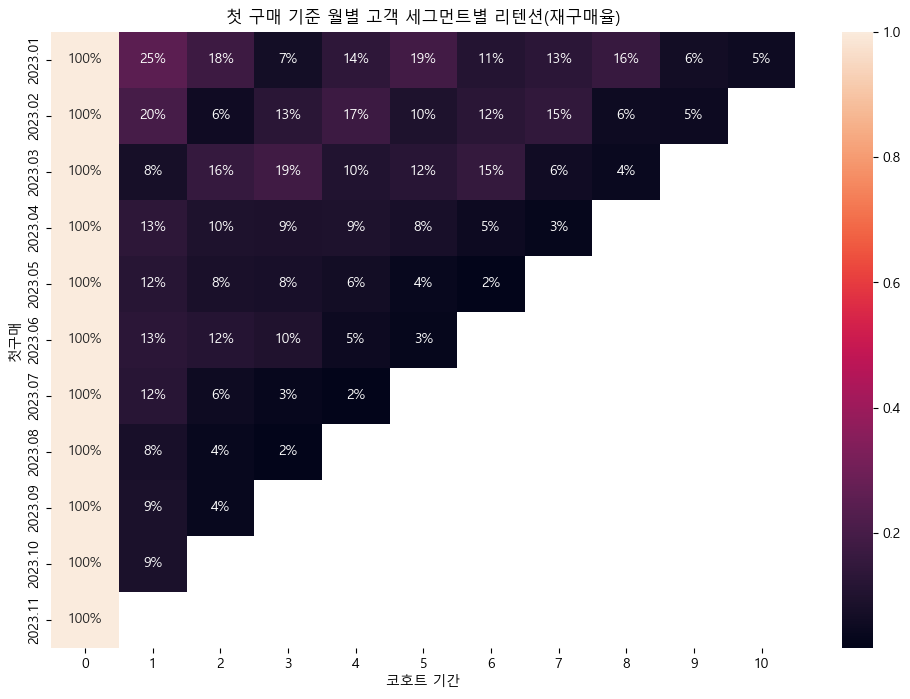

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12,8))
sns.heatmap(retention,annot=True,fmt='.0%')
plt.title('첫 구매 기준 월별 고객 세그먼트별 리텐션(재구매율)')

In [36]:
retention.T

첫구매,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09,2023.10,2023.11
코호트 기간,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.248742,0.199088,0.077685,0.132958,0.120202,0.130820,0.123625,0.081168,0.090055,0.087611,NaN
2,0.175390,0.058165,0.155826,0.095573,0.083489,0.115557,0.055332,0.038452,0.038336,NaN,NaN
3,0.069074,0.126278,0.185986,0.091037,0.080544,0.100359,0.034044,0.017299,NaN,NaN,NaN
4,0.138651,0.173529,0.104037,0.094635,0.064298,0.048801,0.017535,NaN,NaN,NaN,NaN
5,0.189733,0.095745,0.123382,0.079618,0.036959,0.032384,NaN,NaN,NaN,NaN,NaN
6,0.111852,0.124896,0.152475,0.048960,0.020909,NaN,NaN,NaN,NaN,NaN,NaN
7,0.128712,0.146035,0.060472,0.029251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.160292,0.055678,0.043260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='코호트 기간'>

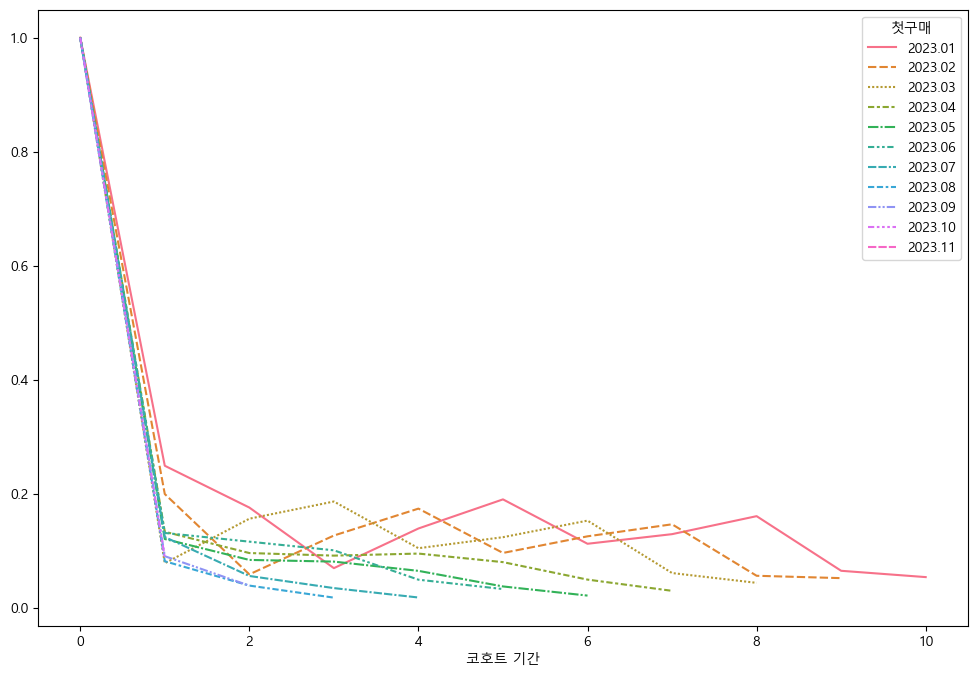

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(retention.T)

In [30]:
retention.values[0:1]

array([[1.        , 0.24874182, 0.17539004, 0.06907398, 0.13865123,
        0.18973327, 0.11185204, 0.12871163, 0.1602919 , 0.06441872,
        0.05334675]])